***
# <center>R2.07 - Graphes <br>TP6 - Communes Bretonnes & Centralités <center>
***

_Tom Ferragut, Thibault Godin_

_IUT de Vannes, BUT Informatique_
***


In [3]:
# importation des packages
import numpy as np
import pandas as pd
import seaborn as sns
import ast as ast
from geopy.distance import geodesic
# importation des modules
import scipy.stats as sps


import networkx as nx


import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,15)

## 0 - Introduction

Le but de ce TP est construire un graphe networkx des communes de Bretagne à partir de données géolocalisée de celles-ci, contenue dans le fichier ***.csv

## 1 - Graphe des communes

### 1.1 - Traitement des données csv

> <font color=darkorange> **_Question 1 :_** </font>
> Executer et comprendre les cellules suivantes. Déduire la traduction française de `amezek` grâce au rôle de cette méthode.

In [5]:
# importation du fichier csv comme un panda dataframe
communes=pd.read_csv("./DonneesFourniesGraphes/voisinageCommunesBretonnes.csv", sep=';')

#on affiche les premières lignes du fichier
communes.head()


insee                  nom  nb_voisins  \
0  22001             Allineuc           5   
1  22002                Andel           5   
2  22003             Aucaleuc           4   
3  22004               Bégard           7   
4  22005  Belle-Isle-en-Terre           5   

                               insee_voisins  
0              22203|22203|22384|22149|22009  
1              22093|22093|22044|22093|22093  
2                    22259|22364|22388|22048  
3  22041|22018|22310|22164|22135|22245|22254  
4              22135|22216|22129|22228|22359

In [6]:
# adaptation du format des données en liste des voisins (exemple)
print(communes['insee_voisins'][0])

print(communes.iloc[0,3])

[int(num) for num in communes['insee_voisins'][0].split('|')]


22203|22203|22384|22149|22009
22203|22203|22384|22149|22009


[22203, 22203, 22384, 22149, 22009]

In [7]:
#on enlève les voisins non bretons (22+29+35+56) et les boucles

def amezek(com):
    voisins = [int(num) for num in communes['insee_voisins'][com].split('|')]
    amezek = []
    for vois in voisins :
        if (22000 <= vois and vois<23000) or (29000 <= vois and vois<30000) or (35000 <= vois and vois<36000) or (56000 <= vois and vois<57000) : #on reste en bretagne
            if vois != communes['insee'][com] : #boucle
                amezek.append(vois)
    return amezek


for x in range(len(communes['insee'])) : 
    amezek(x)
    
# Création d'un dictionaire représentant la liste des voisins, structure proche des graphes networkx

voisins_dict = {communes['insee'][x] : amezek(x) for x in range(len(communes['insee']))}
voisins_dict[29021]


[29064, 29198, 29091]

### 1.2 - Création du graphe à partir des données géographiques

> <font color=darkorange> **_Question 2 :_** </font>
> Executer et comprendre les cellules suivantes. Commenter d'avantage les fonctions quand c'est possible.

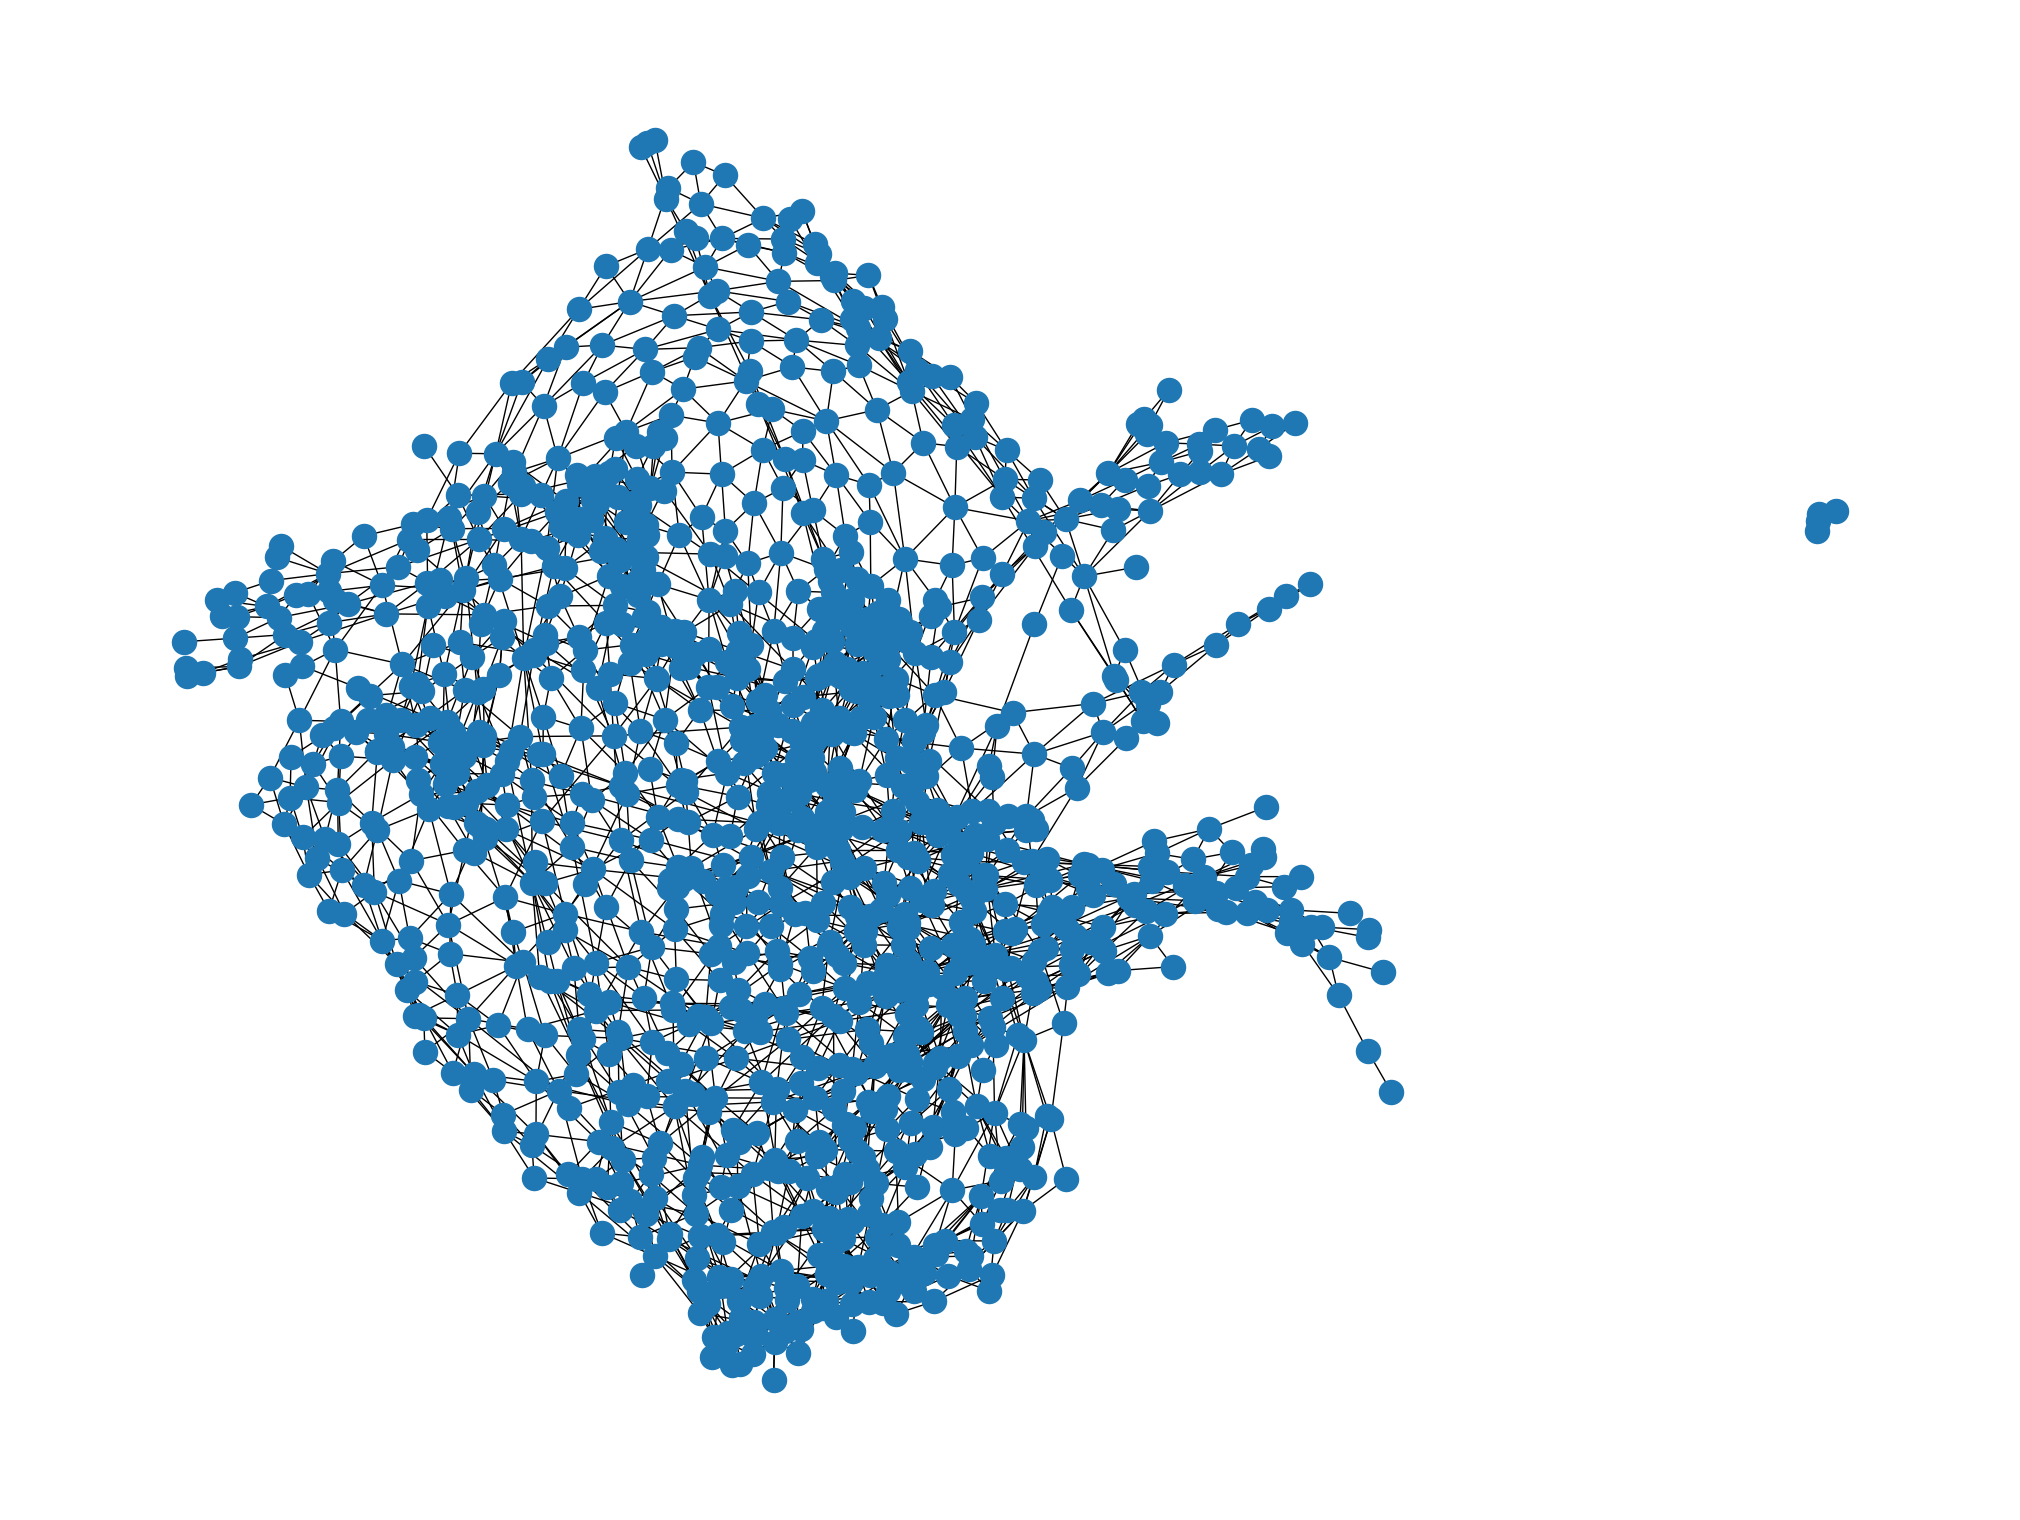

In [8]:
#creation directe via l'outil networkx
G = nx.from_dict_of_lists(voisins_dict)

#pour l'instant les sommets ne sont pas placés géographiquement
nx.draw(G,pos=nx.spring_layout(G))


In [16]:
#lecture des informations geographique

geo=pd.read_csv("./DonneesFourniesGraphes/communes-geo.csv", sep=';') #Récup les coordonnées géographiques des communes

geo.head() #Voir les premières valeurs
geo_lite = geo.iloc[:,[0,1,17,19]] #Garder les colonnes 0, 1, 17, 19

geo_lite.columns #Avoir les noms des colonnes

geo_lite['Geo Point'][0] #Avoir la coordonnées de la colonnes Geo Point de la 1ere ville

Index(['Geo Point', 'Geo Shape', 'Code Officiel Commune',
       'Nom Officiel Commune'],
      dtype='object')

In [18]:
# adaptation du format des données de géolocalisation (exemple)
ast.literal_eval(geo_lite['Geo Point'][0]) #Ecrire de façon jolie

# nouvelle colonne avec la latitude
geo_lite['Latitude']=geo_lite['Geo Point'].apply(lambda x : ast.literal_eval(x)[0]) 
# Nouvelle colonne avec la longitude
geo_lite['Longitude']=geo_lite['Geo Point'].apply(lambda x : ast.literal_eval(x)[1]) 

geo_lite.head()

Geo Point  \
0   47.965835834555435, -2.180339647082372   
1    48.13658848473797, -3.604143385699294   
2   47.66115932253269, -2.8979142904691706   
3     47.8257861710007, -2.623531946315434   
4  48.561815546029436, -2.3352456790830622   

                                           Geo Shape  Code Officiel Commune  \
0  {"coordinates": [[[-2.138393408174076, 47.9796...                  56012   
1  {"coordinates": [[[-3.598896445577899, 48.0809...                  56066   
2  {"coordinates": [[[-2.914167012351387, 47.6298...                  56167   
3  {"coordinates": [[[-2.559861319644625, 47.7984...                  56172   
4  {"coordinates": [[[-2.340377140698437, 48.5296...                  22268   

  Nom Officiel Commune   Latitude  Longitude  
0              Beignon  47.965836  -2.180340  
1               Gourin  48.136588  -3.604143  
2         Plougoumelen  47.661159  -2.897914  
3             Plumelec  47.825786  -2.623532  
4                 Ruca  48.561816  -2.335246

In [20]:
#Ajout des données géographique


# proposition de dictionaire de position pour le tracé en networkx

def pos_insee(G,data):
    pos = {} #dictionnaire vide
    for com in G.nodes:
        #Va chercher la longitude et latitude et l'enregistrement dans le dico
        y = float(data[data['Code Officiel Commune'] == com]['Latitude'].iloc[0])
        x = float(data[data['Code Officiel Commune'] == com]['Longitude'].iloc[0])
        pos[com]=[x,y]
    
    return pos

pos_insee = pos_insee(G,geo_lite)
#print(pos_insee)

print(len(G.nodes)==len(pos_insee))

print(pos_insee[56167])

True
[-2.8979142904691706, 47.66115932253269]


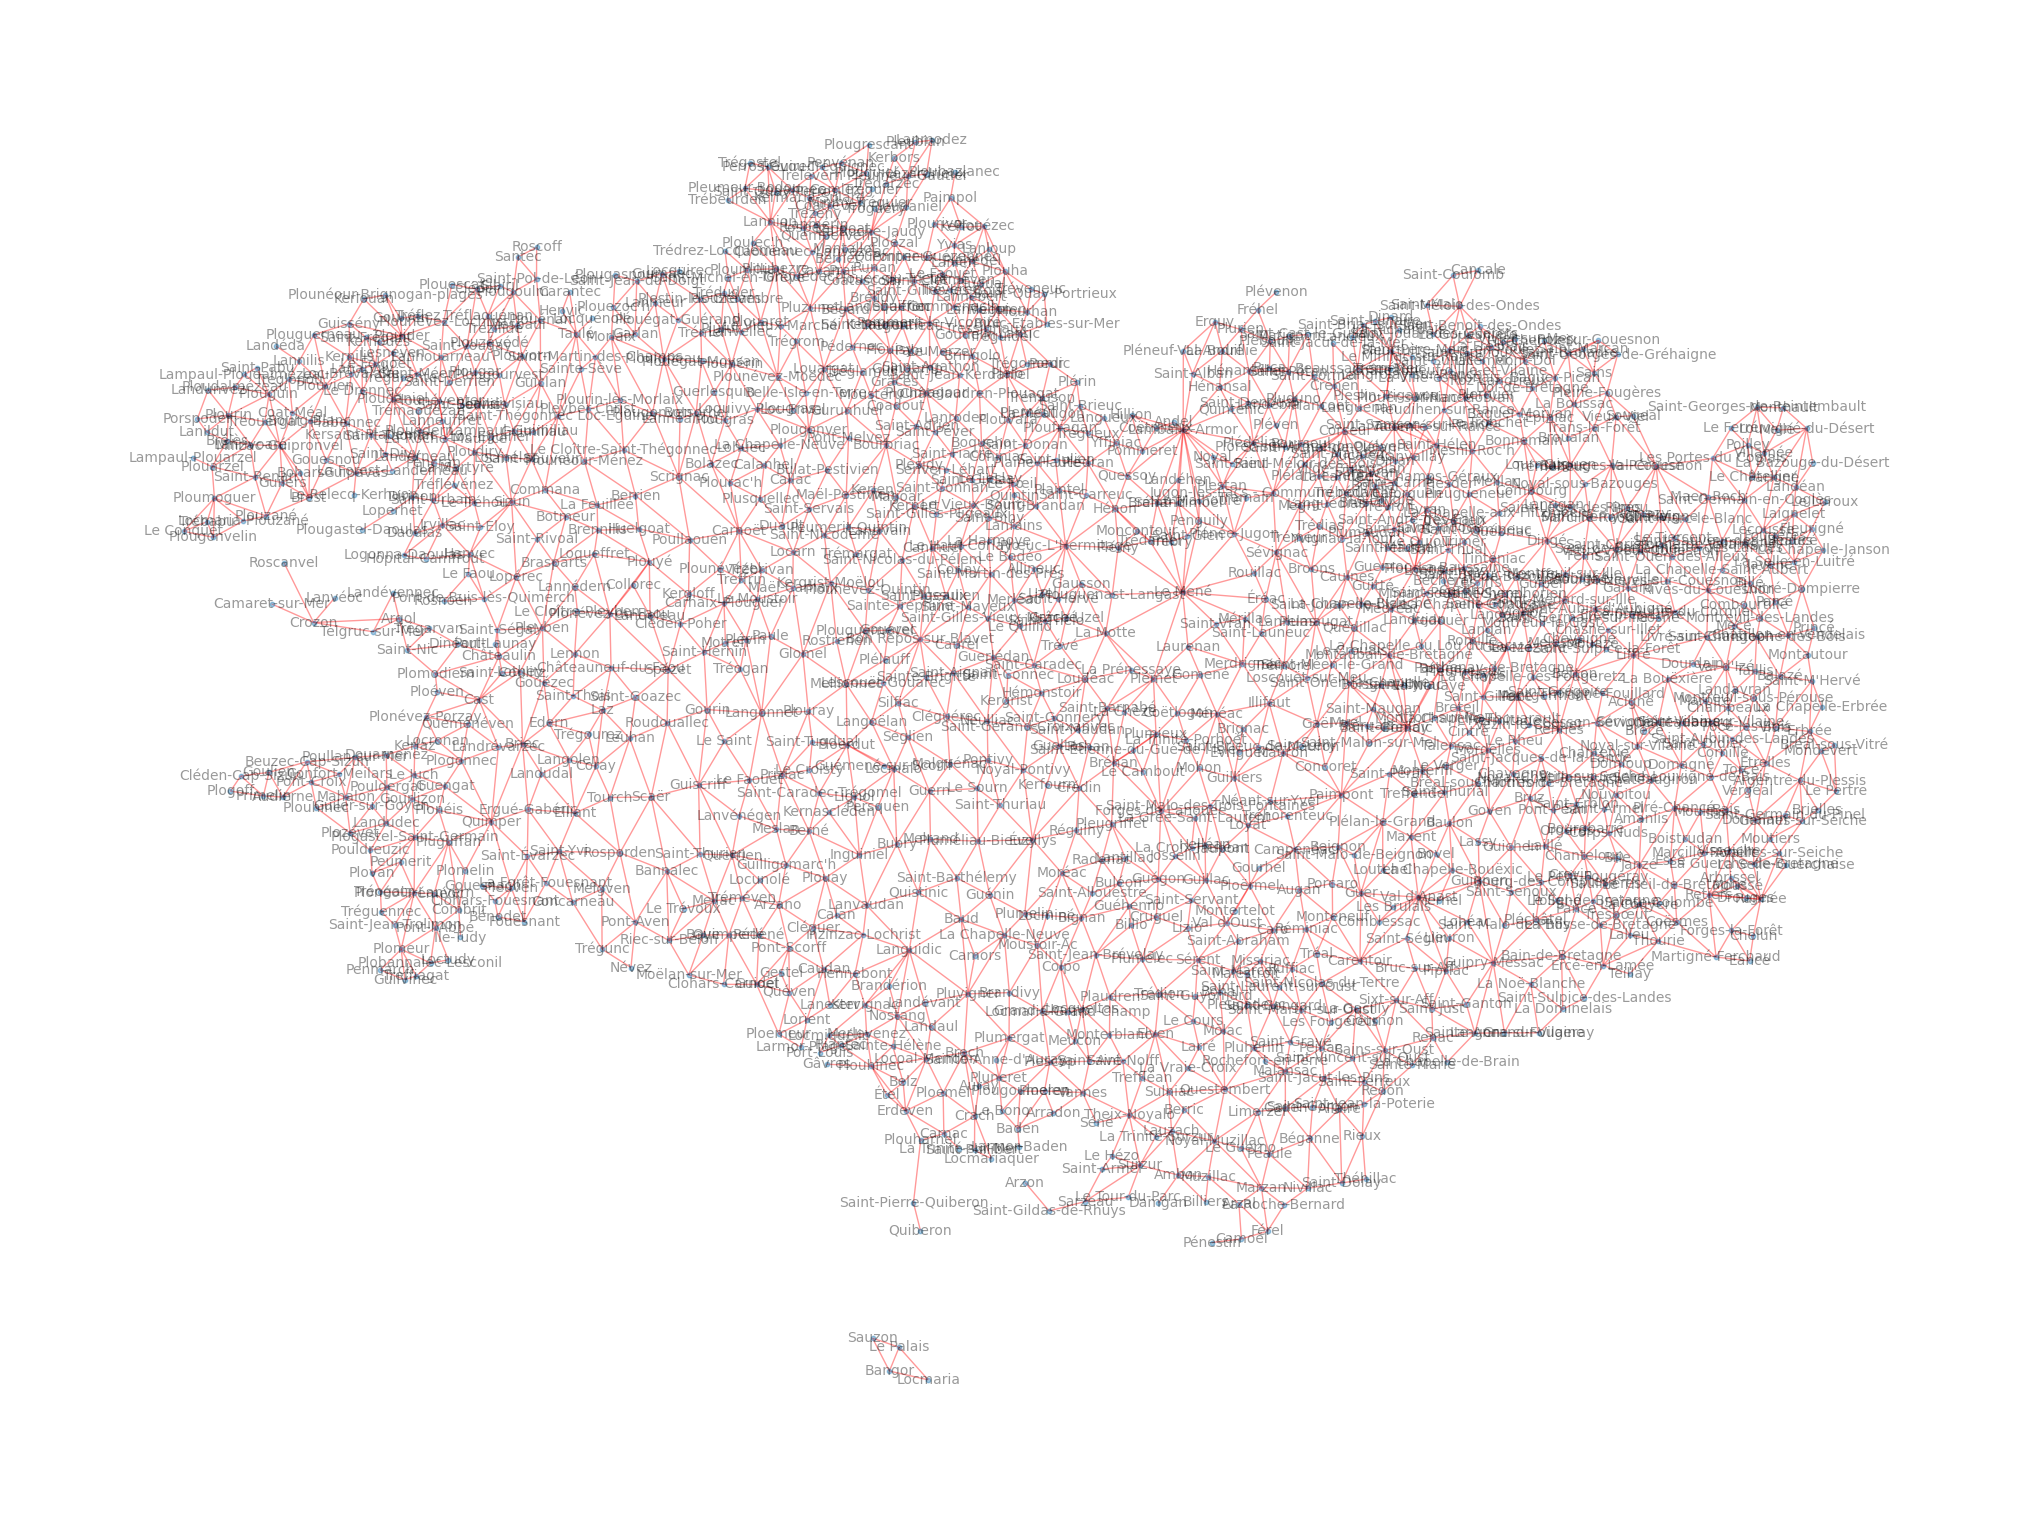

In [21]:
# proposition de dictionnaire de label pour le tracé en networkx

def label_insee(G,data):
    label = {} #dictionnaire vide
    for com in G.nodes:
        #Le numéro devient le nom de la commune
        lab = data[data['Code Officiel Commune'] == com]['Nom Officiel Commune'].iloc[0]
    
        label[com]=lab
    
    return label


label_insee = label_insee(G,geo_lite)

nx.draw(G,pos=pos_insee,node_size=10, alpha=0.4, edge_color="r", font_size=10, labels=label_insee)

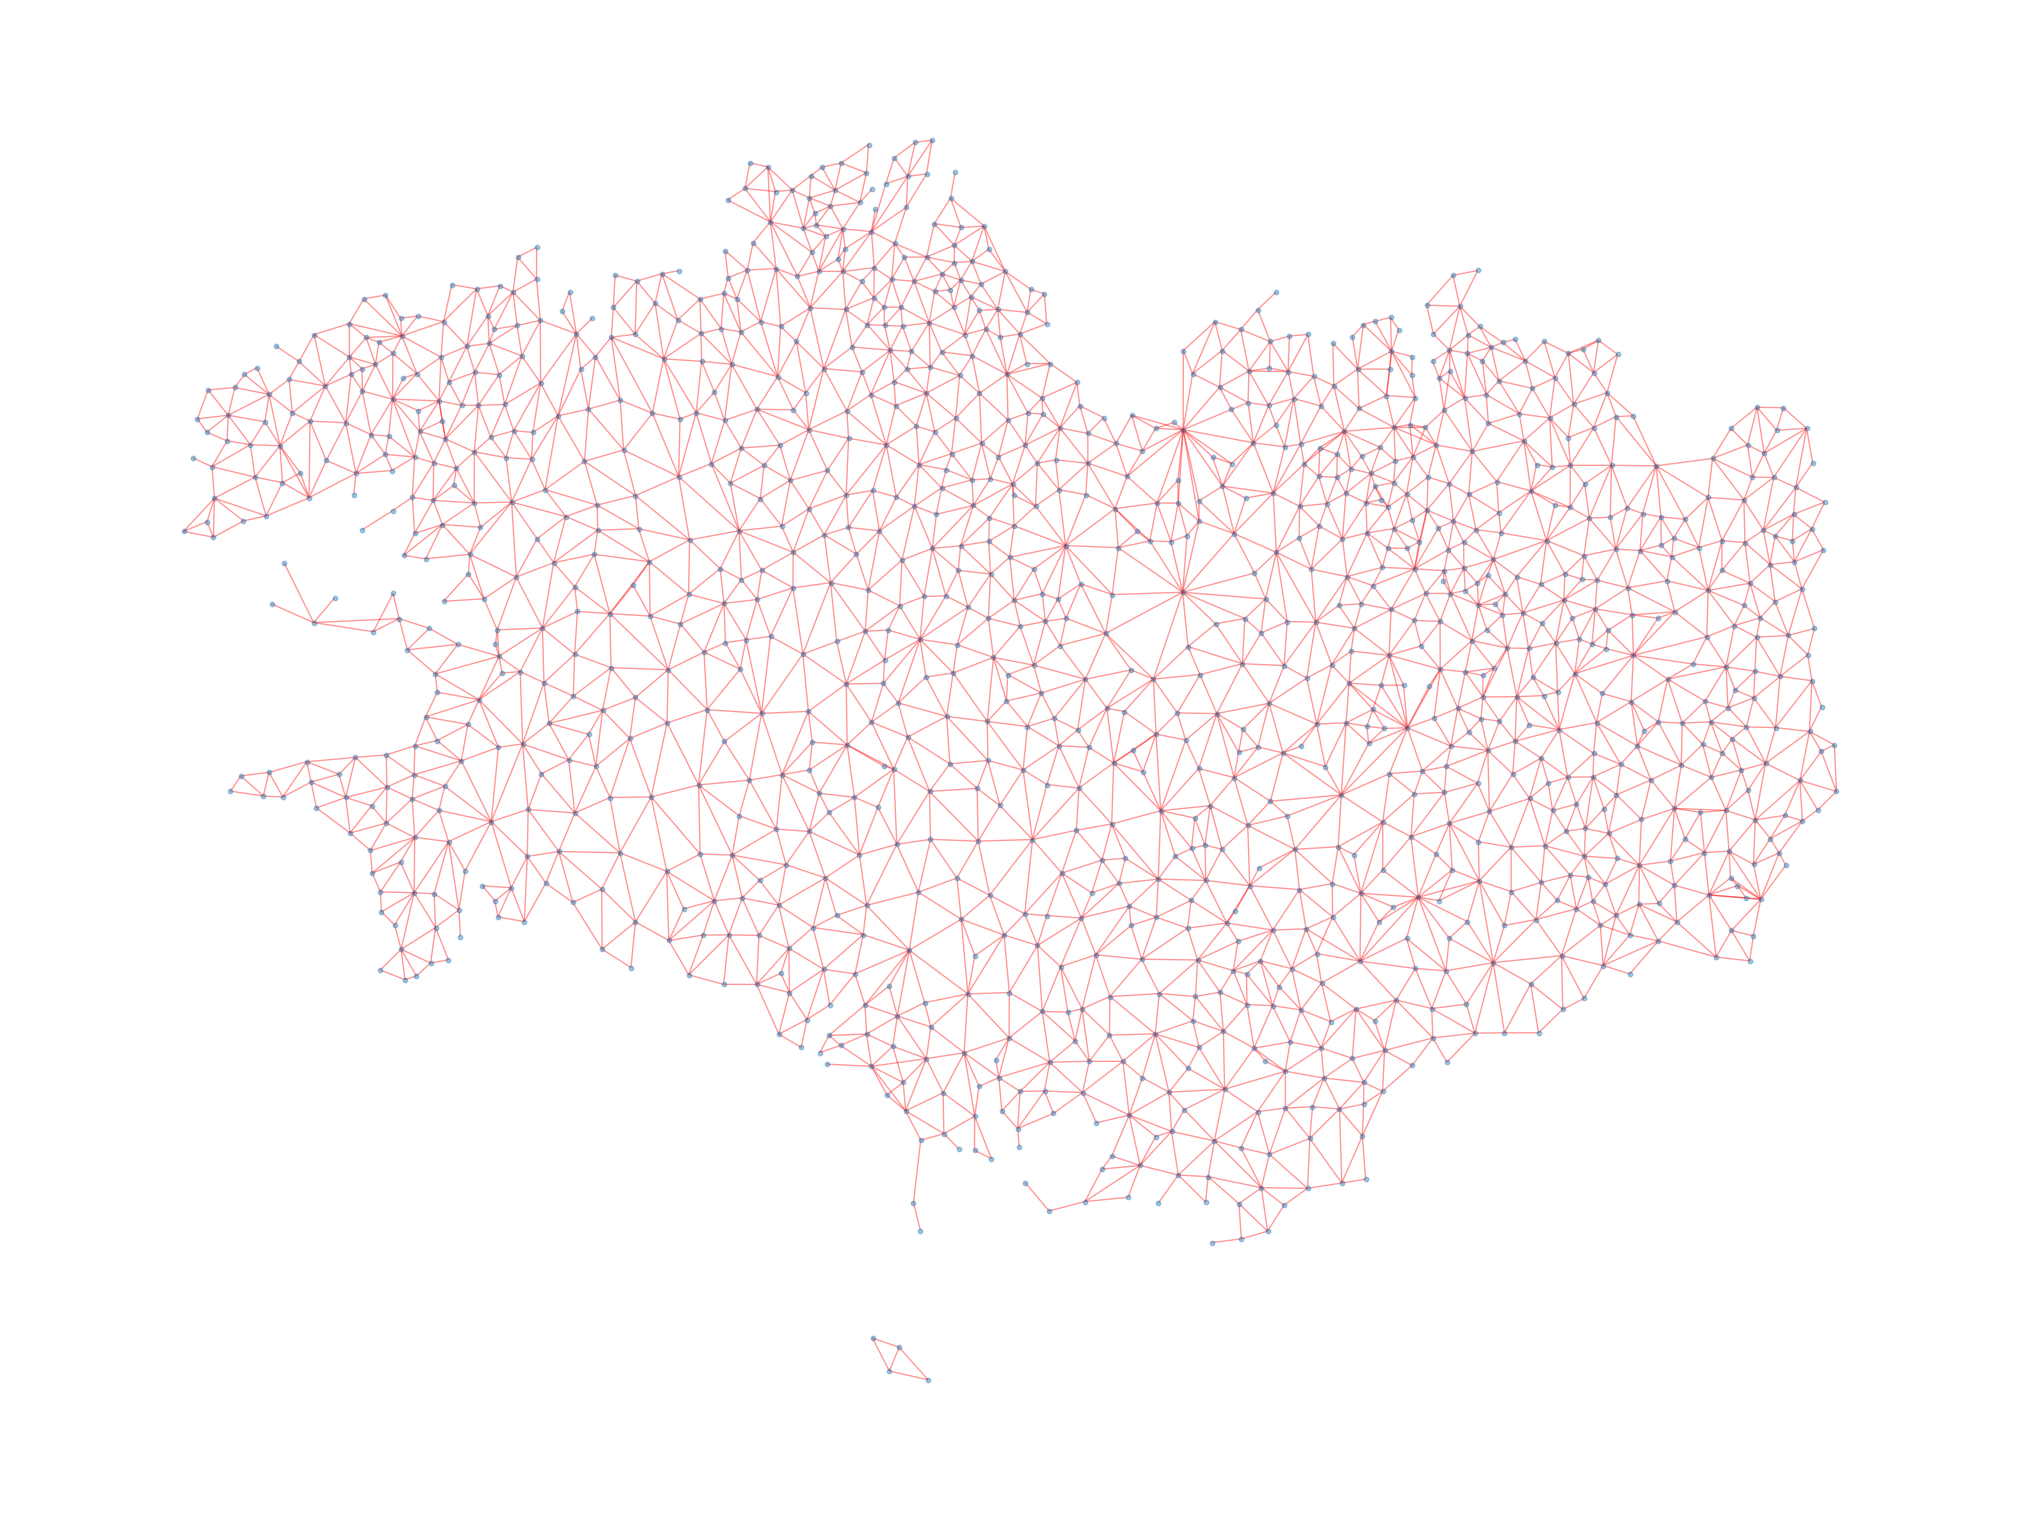

In [22]:
G.remove_edges_from(list(nx.selfloop_edges(G)))
nx.draw(G,pos=pos_insee,node_size=10, alpha=0.4, edge_color="r", font_size=16, with_labels=False)

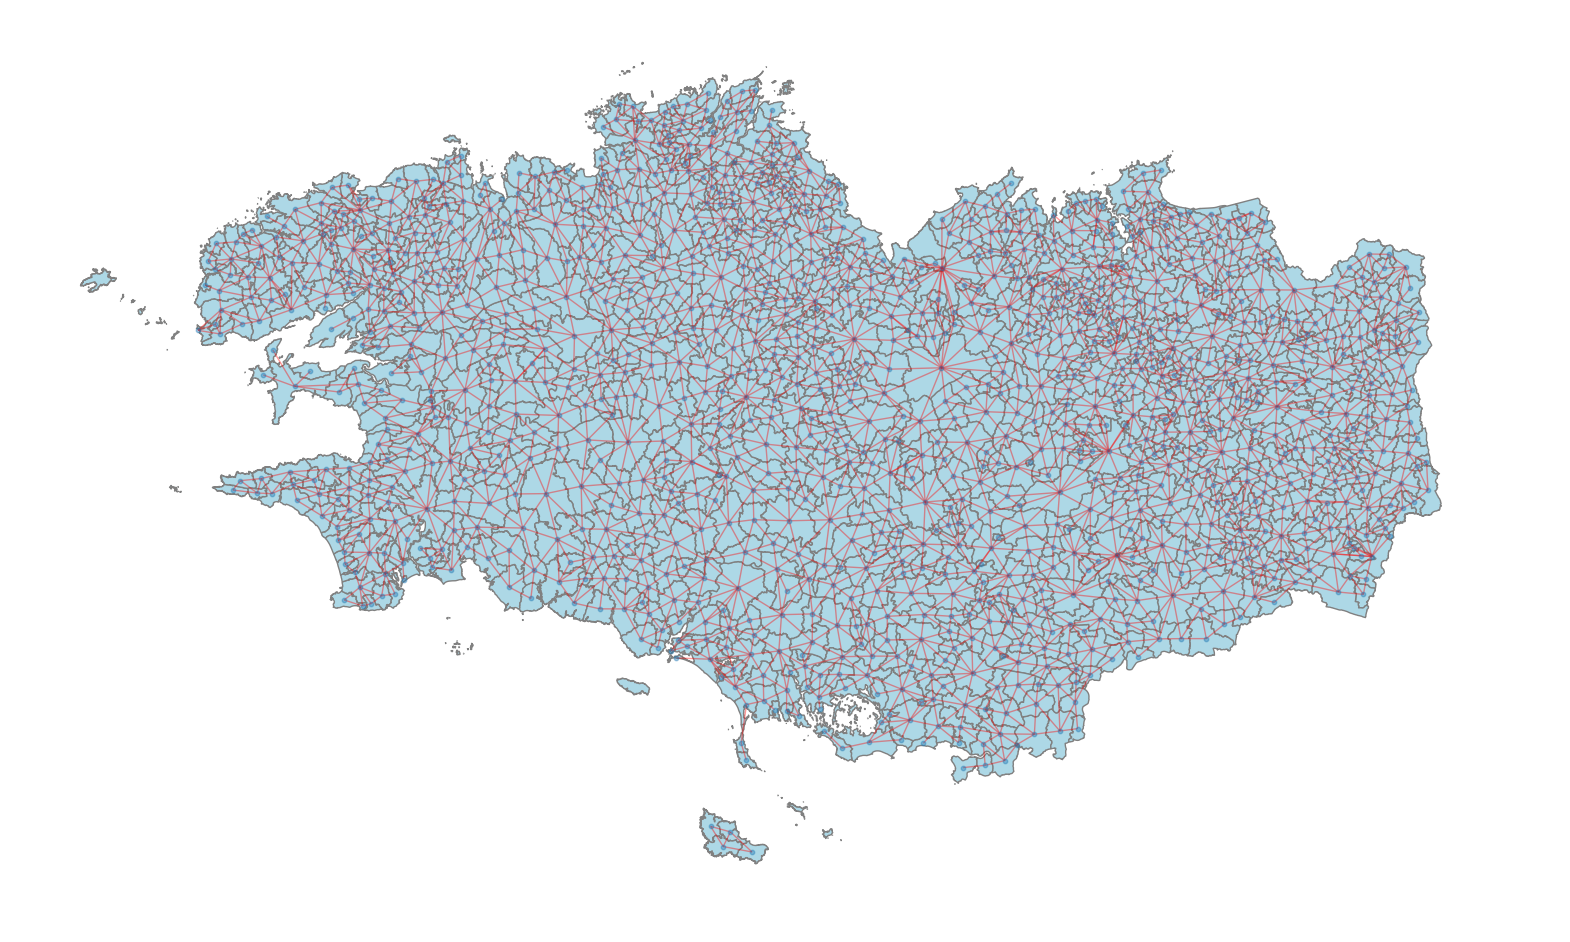

In [24]:
#on peut également utiliser des fonds de carte (via le format geojson par exemple)
import geopandas
region = geopandas.read_file("./DonneesFourniesGraphes/communes-geo.geojson")


plt.close()
# Affiche dans le format de la région avec du gris pour diviser les communes et bleu pour colorier
ax = region.plot(linewidth=1, edgecolor="grey", facecolor="lightblue")
ax.axis("off")
nx.draw(G, pos=pos_insee, ax=ax,node_size=10, alpha=0.4, edge_color="r")
plt.show()

## 2 - Centralité des sommets

> <font color=darkorange> **_Question 3 :_** </font>
> 1) Utiliser la fonction `degree` de networkx pour déterminer la centralité de degré des différentes communes de Bretagne. 
> 2) Quelle est la commune ayant le plus de communes voisines ?

In [63]:
# Récupération du degré (nombre de voisins) pour chaque commune
liste_deg = dict(G.degree())

    # Recherche de la commune avec le plus grand degré
max_deg_node = max(liste_deg, key=liste_deg.get)
max_deg_commune = geo_lite[geo_lite['Code Officiel Commune'] == max_deg_node]['Nom Officiel Commune'].iloc[0]
max_deg_value = liste_deg[max_deg_node]

print(f"La commune avec le plus de voisins est : {max_deg_commune} ({max_deg_node})")
print(f"Elle a {max_deg_value} communes voisines.")


La commune avec le plus de voisins est : Lamballe-Armor (22093)
Elle a 18 communes voisines.


In [64]:
# Récupération du degré (nombre de voisins) pour chaque commune
liste_deg = [G.degree[x] for x in G]

    # Recherche de la commune avec le plus grand degré
max_deg_node = list(G.nodes())[liste_deg.index(max(liste_deg))]
max_deg_commune = geo_lite[geo_lite['Code Officiel Commune'] == max_deg_node]['Nom Officiel Commune'].iloc[0]
max_deg_value = max(liste_deg)

print(f"La commune avec le plus de voisins est : {max_deg_commune} ({max_deg_node})")
print(f"Elle a {max_deg_value} communes voisines.")


La commune avec le plus de voisins est : Lamballe-Armor (22093)
Elle a 18 communes voisines.


> <font color=darkorange> **_Question 4 :_** </font>
> 1) En utilisant la fonction `nx.single_source_shortest_path_length`, implémenter une fonction `closeness_centrality` prenant en entrée un graphe $G$ et un sommet $s$, et renvoyant la centralité de proximité de ce sommet $s$. 
> 2) Quelle commune possède la plus petite centralité de proximité ?

In [65]:
def closeness_centrality(G, s):
    """
    Calcule manuellement la centralité de proximité du sommet s dans le graphe G.

    :param G: un graphe NetworkX non orienté
    :param s: un sommet du graphe
    :return: la centralité de proximité de s
    """
    dico = nx.single_source_shortest_path_length(G, s)
    somme = sum(dico.values())
    if somme > 1:
        return (somme / (len(G) - 1))
    else:
        return 0

    # Calcul des centralités pour tous les sommets
closeness_values = {node: closeness_centrality(G, node) for node in G.nodes}

# Sommet avec la plus petite centralité
min_node = min(closeness_values, key=closeness_values.get)
min_commune = geo_lite[geo_lite['Code Officiel Commune'] == min_node]['Nom Officiel Commune'].iloc[0]
min_value = closeness_values[min_node]

print(f"La commune avec la plus petite centralité de proximité est : {min_commune} ({min_node})")
print(f"Centralité de proximité : {min_value:.6f}")


La commune avec la plus petite centralité de proximité est : Bangor (56009)
Centralité de proximité : 0.002508


> <font color=darkorange> **_Question 5 :_** </font>
> 1) Implémenter une fonction `betweenness_centrality` prenant en entrée un sous_graphe `G_morbihan` et un sommet $s$, et renvoyant la centralité d’intermédiarité de ce sommet $s$. 
> 2) Quelle commune du Morbihan possède la plus grande centralité de proximité ?

In [14]:
# Extraction d'un sous-graphe du Morbihan (codes INSEE 56000 à 56100)
morbihan_nodes = [n for n in G.nodes if 56000 <= n < 56100]
G_morbihan = G.subgraph(morbihan_nodes)

In [16]:
def betweenness_centrality(G, s):
    """
    Calcule la centralité d'intermédiarité du sommet s dans le graphe G (version lente et manuelle).
    """
    #TODO

    return #TODO

# Calcul manuel de la centralité d'intermédiarité sur le Morbihan
centralites_btw = {node: betweenness_centrality(G_morbihan, node) for node in G_morbihan.nodes}

# Commune avec la plus grande centralité
max_node = #TODO
max_commune = #TODO
max_value = #TODO

print(f"La commune avec la plus grande centralité d'intermédiarité est : {max_commune} ({max_node})")
print(f"Centralité d'intermédiarité : {max_value:.4f}")


La commune avec la plus grande centralité d'intermédiarité est : Bignan (56017)
Centralité d'intermédiarité : 70.0000


## Bonus - Famille dominante

> <font color=darkorange> **_Question Bonus :_** </font>
> Trouver une liste de communes du Morbihan, la plus petite possible, où placer des antennes radio de sorte à ce que :
> - Chaque commune contient un antenne radio ou est voisine d'une commune en contenant une.

In [19]:
# Extraction du sous-graphe Morbihan (codes INSEE 56000 à 56999)
morbihan_nodes = [n for n in G.nodes if 56000 <= n < 57000]
G_morbihan = G.subgraph(morbihan_nodes)

#TODO